### **NOTES**


Projeto de ML, aplicação de Regressão Logística 

_Exploração de dados de publicidade (Advertising)_

Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos dados desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo diário gasto no site (min).
* 'Age': idade do consumidor (anos).
* 'Area Income': média da renda do consumidor na região ($).
* 'Daily Internet Usage': média diária que o consumidor fica online (min).
* 'Ad Topic Line': título do anúncio.
* 'City': cidade do consumidor.
* 'Male': se o consumidor era ou não masculino.
* 'Country': país do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad': se clicou ou não no anúncio.


----

### **INITIAL IMPORTS** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')


----

### **FUNCTIONS**

----

### **CLEANING / EDA**

In [2]:
#.info()  #.head(3)  #.tail()  #.columns
#[''].unique()  #.isnull().sum()  #[''].value_counts()
# #.describe()

#dataset treino
df_train = pd.read_csv('./advertising.csv')

In [3]:
#df_train.info()
#df_train.tail()
#df_train['Male'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
#boa prática:
#df_train, df_test  -> ficam somente p/ consulta
#alterações, criação de novas series -> add em novos data frames

df_clean = df_train


In [8]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


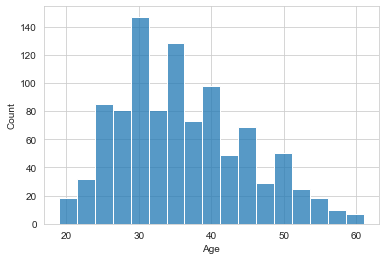

In [25]:
sns.histplot(data=df_clean, x='Age');


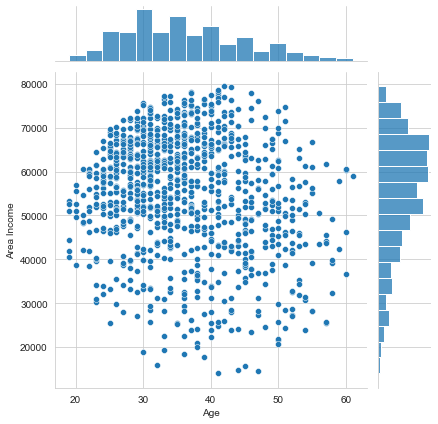

In [28]:
sns.jointplot(data=df_clean, x='Age', y='Area Income');


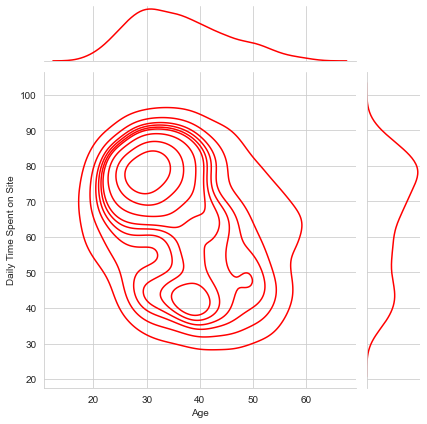

In [33]:
sns.jointplot(data=df_clean, x='Age', y='Daily Time Spent on Site', kind='kde', color='red');

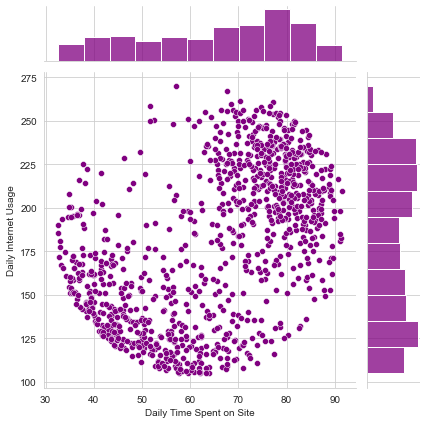

In [37]:
sns.jointplot(data=df_clean, y='Daily Internet Usage', x='Daily Time Spent on Site', color='purple');

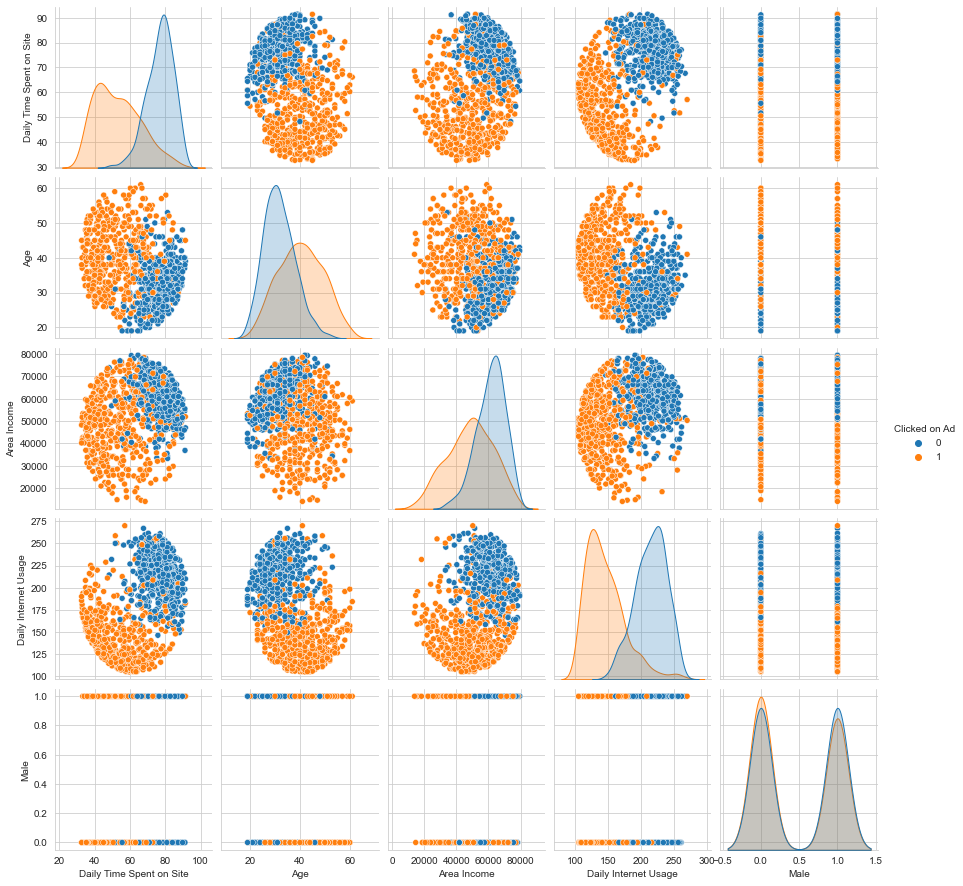

In [39]:
sns.pairplot(df_clean, hue='Clicked on Ad');

In [41]:
#separando o df_clean em dados de treino e teste
from sklearn.model_selection import train_test_split


In [ ]:
x = df_clean[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df_clean['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [ ]:
#x_train
#y_train


----

### **TRAIN / TEST**

In [ ]:
#treino
from sklearn.linear_model import LogisticRegression


In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)


In [45]:
#teste
predictions = log_reg_model.predict(x_test)


----

### **MODEL EVALUATION**

In [50]:
#criando relatório de classificação para o modelo
from sklearn.metrics import classification_report, confusion_matrix


In [51]:
confusion_matrix(y_test, predictions)


array([[156,   6],
       [ 25, 143]], dtype=int64)

Confusion Matrix:

linhas: indica o que o modelo previu

colunas: o que aconteceu de fato




                    0               1
                    ñ clicou        clicou

    *ñ clicou       156             6

    *clicou         25              143


*predição do modelo


In [49]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



----

### **CONCLUSIONS**

F1 Score: 91%

(corresponde à média harmônica entre os valores de clique e não-clique)

Acurácia: 91%


Conclusão: por se tratar de um conjunto fictício, com uma acurácia de 91% o modelo performou muito bem.

----

### **END**